In [58]:
from pandas import read_csv
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data=pd.read_csv('cleaned_data.csv')
print(data.keys())

Index(['Unnamed: 0', 'id', 'title', 'description', 'time1', 'time2', 'tags',
       'location', 'event'],
      dtype='object')


In [59]:
data=data.drop(['Unnamed: 0'],axis=1)
data.head(4)


,id,title,description,time1,time2,tags,location,event
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",NaN,135961.0
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",NaN,135961.0
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238289 entries, 0 to 238288
Data columns (total 8 columns):
id             238288 non-null float64
title          228552 non-null object
description    78167 non-null object
time1          237305 non-null object
time2          237305 non-null object
tags           237305 non-null object
location       89477 non-null object
event          237304 non-null float64
dtypes: float64(2), object(6)
memory usage: 14.5+ MB


In [75]:
data['all-text']=""
data.loc[data['title'].notnull(),'all-text']=data['all-text']+" "+data['title']
data.loc[data['description'].notnull(),'all-text']=data['all-text']+" "+data['description']
data.loc[data['time1'].notnull(),'all-text']=data['all-text']+" "+data['title']
data.loc[data['tags'].notnull(),'all-text']=data['all-text']+" "+data['title']
data.loc[data['location'].notnull(),'all-text']=data['all-text']+" "+data['title']

In [76]:
data.head(20)

,id,title,description,time1,time2,tags,location,event,all-text
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",NaN,135961.0,"Dan to the Right This is ...Dan, he was to th..."
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",NaN,135961.0,Dan1 We had another Flickr meetup in Rocheste...
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_01 <a href=http://www.flickr.com...
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_02 Our Latvian friend. Flickrmee...
4,298736527.0,Flickrmeetup_03,One of my first Flickr contacts <a href=http:/...,2006-01-01 08:46:54.000,2006-01-01 07:46:54.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_03 One of my first Flickr contac...
5,298736583.0,Flickrmeetup_04,Our Latvian friend.,2006-01-01 08:47:03.000,2006-01-01 07:47:03.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_04 Our Latvian friend. Flickrmee...
6,298736638.0,Flickrmeetup_05,<a href=http://www.flickr.com/photos/danpb/>Da...,2006-01-01 08:47:12.000,2006-01-01 07:47:12.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_05 <a href=http://www.flickr.com...
7,298736709.0,Flickrmeetup_06,"Help, this is what you get when you give someo...",2006-01-01 08:47:22.000,2006-01-01 07:47:22.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,"Flickrmeetup_06 Help, this is what you get wh..."
8,298736781.0,Flickrmeetup_07,<a href=http://www.flickr.com/photos/jlam/>jla...,2006-01-01 08:47:32.000,2006-11-16 07:47:32.000,"rochester , ny , usa , flickrmeetup , king76 ,...",NaN,123862.0,Flickrmeetup_07 <a href=http://www.flickr.com...
9,298736848.0,Flickrmeetup_08,<a href=http://www.flickr.com/photos/haccamopo...,2006-01-01 08:47:41.000,2006-01-01 07:47:41.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_08 <a href=http://www.flickr.com...


In [77]:
data['event'].dropna(0, inplace=True)

data['event']=data['event'].astype(int)
data['location']=data['location'].fillna("l=0 n=0 a=0")
#data.head()
data['first'] = data['location'].str.split(' ',expand=True)[0]
data['second']=data['location'].str.split(' ',expand=True)[1]
data['third']=data['location'].str.split(' ',expand=True)[2]

data['longitude'] = data['first'].str.extract(r'(-?\d+\.?\d*)', expand=False)
data['latitude'] = data['second'].str.extract(r'(-?\d+\.?\d*)', expand=False)
data['accuracy'] = data['third'].str.extract(r'(-?\d+\.?\d*)', expand=False)
data=data.drop(['first'],axis=1)
data=data.drop(['second'],axis=1)
data=data.drop(['third'],axis=1)

data.head(10)

,id,title,description,time1,time2,tags,location,event,all-text,longitude,latitude,accuracy
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",l=0 n=0 a=0,135961.0,"Dan to the Right This is ...Dan, he was to th...",0,0,0
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",l=0 n=0 a=0,135961.0,Dan1 We had another Flickr meetup in Rocheste...,0,0,0
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_01 <a href=http://www.flickr.com...,-77.58403,43.15915,15
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_02 Our Latvian friend. Flickrmee...,-77.58403,43.15915,15
4,298736527.0,Flickrmeetup_03,One of my first Flickr contacts <a href=http:/...,2006-01-01 08:46:54.000,2006-01-01 07:46:54.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_03 One of my first Flickr contac...,-77.58403,43.15915,15
5,298736583.0,Flickrmeetup_04,Our Latvian friend.,2006-01-01 08:47:03.000,2006-01-01 07:47:03.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_04 Our Latvian friend. Flickrmee...,-77.58403,43.15915,15
6,298736638.0,Flickrmeetup_05,<a href=http://www.flickr.com/photos/danpb/>Da...,2006-01-01 08:47:12.000,2006-01-01 07:47:12.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_05 <a href=http://www.flickr.com...,-77.58403,43.15915,15
7,298736709.0,Flickrmeetup_06,"Help, this is what you get when you give someo...",2006-01-01 08:47:22.000,2006-01-01 07:47:22.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,"Flickrmeetup_06 Help, this is what you get wh...",-77.58403,43.15915,15
8,298736781.0,Flickrmeetup_07,<a href=http://www.flickr.com/photos/jlam/>jla...,2006-01-01 08:47:32.000,2006-11-16 07:47:32.000,"rochester , ny , usa , flickrmeetup , king76 ,...",l=0 n=0 a=0,123862.0,Flickrmeetup_07 <a href=http://www.flickr.com...,0,0,0
9,298736848.0,Flickrmeetup_08,<a href=http://www.flickr.com/photos/haccamopo...,2006-01-01 08:47:41.000,2006-01-01 07:47:41.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_08 <a href=http://www.flickr.com...,-77.58403,43.15915,15


In [79]:
data.loc[data['location']=="l=0 n=0 a=0",'location']="0"

In [81]:
data.description=data.description.astype(str)
data.title=data.title.astype(str)
data.time1=data.time1.astype(str)
data.tags=data.tags.astype(str)
data['all-text']=data['all-text'].astype(str)

In [91]:
def get_corpus(content):
    corpus = []
    x=0
    for item in content:
        x+=1
        #if x%10000==0:print(x)
        if item!='nan':
            corpus.append(item)
    return corpus


In [92]:
cc=get_corpus(data.tags)

In [8]:
corpus=get_corpus()
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(corpus)
#corpus.head(10)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def tags_tfidf():
    corpus=get_corpus(data.tags)
    vectorizer=CountVectorizer(stop_words='english')
    #vectorizer.fit_transform(corpus)
    #corpus.head(10)
    transformer = TfidfTransformer() #构建一个计算TF-IDF的玩意儿
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    return tfidf

def all_tfidf():
    corpus=get_corpus(data['all-text'])
    vectorizer=CountVectorizer(stop_words='english')
    #vectorizer.fit_transform(corpus)
    #corpus.head(10)
    transformer = TfidfTransformer() #构建一个计算TF-IDF的玩意儿
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    return tfidf

def description_tfidf():
    corpus=get_corpus(data.description)
    vectorizer=CountVectorizer()
    #vectorizer.fit_transform(corpus)
    #corpus.head(10)
    transformer = TfidfTransformer() #构建一个计算TF-IDF的玩意儿
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    return tfidf

def title_tfidf():
    corpus=get_corpus(data.title)
    vectorizer=CountVectorizer()
    #vectorizer.fit_transform(corpus)
    #corpus.head(10)
    transformer = TfidfTransformer() #构建一个计算TF-IDF的玩意儿
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    return tfidf


In [83]:
import math
def dot_product(v1, v2):
    return sum(a * b for a, b in zip(v1, v2))
def magnitude(vector):
    return math.sqrt(dot_product(vector, vector))
def similarityText(v1, v2):
    return dot_product(v1, v2) / (magnitude(v1) * magnitude(v2) + .00000000001)

In [84]:
similarity(a.toarray()[0],b.toarray()[0])

NameError: name 'similarity' is not defined

In [11]:
stop_word=pd.read_csv('stopword.txt', header=None)
stop_word.columns=['words']
stopword=stop_word.words

In [94]:
tfidf_tags=tags_tfidf()
tfidf_all=all_tfidf()
tfidf_description=description_tfidf()
tfidf_title=title_tfidf()

In [137]:
print(tfidf_tags[0])

  (0, 36033)	0.249505535935
  (0, 67155)	0.323646280031
  (0, 28854)	0.401036045069
  (0, 78658)	0.529499681928
  (0, 5072)	0.473469198196
  (0, 80206)	0.043124338984
  (0, 34098)	0.0431279736292
  (0, 2727)	0.404854835702


In [148]:
a=tfidf_tags[0]
b=tfidf_tags[92]
print(similarityText(a.toarray()[0],b.toarray()[0]))

0.00412231755636


In [13]:
stop_word.columns=['words']

In [14]:
print(x[0])
print("----------")
print(tfidf_new[0])

  (0, 38645)	0.262237741794
  (0, 21692)	0.146034835487
  (0, 12413)	0.539606727576
  (0, 19617)	0.203032835128
  (0, 41327)	0.150534180648
  (0, 38958)	0.121162989106
  (0, 38462)	0.0766026595013
  (0, 33145)	0.227625459757
  (0, 39072)	0.203032835128
  (0, 20477)	0.0840516995928
  (0, 20491)	0.0840654461429
  (0, 42297)	0.111389750499
  (0, 16851)	0.136441348502
  (0, 10884)	0.0919286329738
  (0, 30237)	0.119555887715
  (0, 12464)	0.39715615527
  (0, 2892)	0.422457583631
  (0, 35213)	0.192767401322
----------
  (0, 12350)	0.593916904395
  (0, 32951)	0.250535439074
  (0, 38825)	0.223467623303
  (0, 20356)	0.09251130996
  (0, 20370)	0.0925264400689
  (0, 42011)	0.122600872853
  (0, 16757)	0.150173856612
  (0, 10825)	0.10118103858
  (0, 30047)	0.131588913009
  (0, 12401)	0.437129009416
  (0, 2892)	0.464976968385
  (0, 35011)	0.21216899718


In [99]:
num=len(data)
data['des_tfidf']=-1
list_des=[]
count=0
for i in range(0,num):
    #if count%1000==0:print(count)
    if data.description[i]!="nan":
        #data.des_tfidf[i]=count
        list_des.append(count)
        count+=1
    else:list_des.append(-1)
        
data['des_tfidf']=list_des

In [100]:
data.title=data.title.astype(str)
num=len(data)
list_title=[]
data['title_tfidf']=-1
count=0
for i in range(0,num):
    #if count%1000==0:print(count)
    if data.title[i]!="nan":
        #data.des_tfidf[i]=count
        list_title.append(count)
        count+=1
    else:list_title.append(-1)

data.title_tfidf=list_title

In [101]:
data.tags=data.tags.astype(str)
num=len(data)
list_tags=[]
#data['title_tfidf']=-1
count=0
for i in range(0,num):
    #if count%1000==0:print(count)
    if data.tags[i]!="nan":
        #data.des_tfidf[i]=count
        list_tags.append(count)
        count+=1
    else:list_tags.append(-1)
        
data['tags_tfidf']=-1
data['tags_tfidf']=list_tags

In [102]:
num=len(data)
list_title=[]
data['all_tfidf']=-1
count=0
for i in range(0,num):
    #if count%1000==0:print(count)
    if data['all-text'][i]!="nan":
        #data.des_tfidf[i]=count
        list_title.append(count)
        count+=1
    else:list_title.append(-1)
        
data.all_tfidf=list_title

In [103]:
data.head(5)

,id,title,description,time1,time2,tags,location,event,all-text,longitude,latitude,accuracy,des_tfidf,title_tfidf,tags_tfidf,all_tfidf
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",0,135961.0,"Dan to the Right This is ...Dan, he was to th...",0,0,0,0,0,0,0
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",0,135961.0,Dan1 We had another Flickr meetup in Rocheste...,0,0,0,1,1,1,1
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_01 <a href=http://www.flickr.com...,-77.58403,43.15915,15,2,2,2,2
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_02 Our Latvian friend. Flickrmee...,-77.58403,43.15915,15,3,3,3,3
4,298736527.0,Flickrmeetup_03,One of my first Flickr contacts <a href=http:/...,2006-01-01 08:46:54.000,2006-01-01 07:46:54.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_03 One of my first Flickr contac...,-77.58403,43.15915,15,4,4,4,4


In [104]:
data.longitude=data.longitude.astype(float)
data.latitude=data.latitude.astype(float)
data.accuracy=data.accuracy.astype(float)

In [107]:
withoutnull=data[data['event'].notnull()]
withoutnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237304 entries, 0 to 238288
Data columns (total 16 columns):
id             237304 non-null float64
title          237304 non-null object
description    237304 non-null object
time1          237304 non-null object
time2          237304 non-null object
tags           237304 non-null object
location       237304 non-null object
event          237304 non-null float64
all-text       237304 non-null object
longitude      237304 non-null float64
latitude       237304 non-null float64
accuracy       237304 non-null float64
des_tfidf      237304 non-null int64
title_tfidf    237304 non-null int64
tags_tfidf     237304 non-null int64
all_tfidf      237304 non-null int64
dtypes: float64(5), int64(4), object(7)
memory usage: 30.8+ MB


In [105]:
data.to_csv("after.csv",encoding='utf-8',index=False)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238289 entries, 0 to 238288
Data columns (total 16 columns):
id             238288 non-null float64
title          238289 non-null object
description    238289 non-null object
time1          238289 non-null object
time2          237305 non-null object
tags           238289 non-null object
location       238289 non-null object
event          237304 non-null float64
all-text       238289 non-null object
longitude      238289 non-null float64
latitude       238288 non-null float64
accuracy       238288 non-null float64
des_tfidf      238289 non-null int64
title_tfidf    238289 non-null int64
tags_tfidf     238289 non-null int64
all_tfidf      238289 non-null int64
dtypes: float64(5), int64(4), object(7)
memory usage: 29.1+ MB


In [192]:
xdata=read_csv("after.csv")
xdata.head(10)

,id,title,description,time1,time2,tags,location,event,longitude,latitude,accuracy,des_tfidf,title_tfidf,tags_tfidf
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",l=0 n=0 a=0,135961,0.00000,0.00000,0.0,0,0,0
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",l=0 n=0 a=0,135961,0.00000,0.00000,0.0,1,1,1
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,2,2,2
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,3,3,3
4,298736527.0,Flickrmeetup_03,One of my first Flickr contacts <a href=http:/...,2006-01-01 08:46:54.000,2006-01-01 07:46:54.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,4,4,4
5,298736583.0,Flickrmeetup_04,Our Latvian friend.,2006-01-01 08:47:03.000,2006-01-01 07:47:03.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,5,5,5
6,298736638.0,Flickrmeetup_05,<a href=http://www.flickr.com/photos/danpb/>Da...,2006-01-01 08:47:12.000,2006-01-01 07:47:12.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,6,6,6
7,298736709.0,Flickrmeetup_06,"Help, this is what you get when you give someo...",2006-01-01 08:47:22.000,2006-01-01 07:47:22.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,7,7,7
8,298736781.0,Flickrmeetup_07,<a href=http://www.flickr.com/photos/jlam/>jla...,2006-01-01 08:47:32.000,2006-11-16 07:47:32.000,"rochester , ny , usa , flickrmeetup , king76 ,...",l=0 n=0 a=0,123862,0.00000,0.00000,0.0,8,8,8
9,298736848.0,Flickrmeetup_08,<a href=http://www.flickr.com/photos/haccamopo...,2006-01-01 08:47:41.000,2006-01-01 07:47:41.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862,-77.58403,43.15915,15.0,9,9,9


## one-pass cluster

In [220]:
import numpy as np
import time
import matplotlib.pylab as pl
from math import radians, cos, sin, asin, sqrt
 
 
# 定义一个簇单元
class ClusterUnit:
    def __init__(self):
        self.node_list = []  # 该簇存在的节点列表
        self.node_num = 0  # 该簇节点数
        self.centroid = None  # 该簇质心
 
    def add_node(self, node, node_vec):
        """
        为本簇添加指定节点，并更新簇心
         node_vec:该节点的特征向量
         node:节点
         return:null
        """
        self.node_list.append(node)
        try:
            self.centroid = (self.node_num * self.centroid + node_vec) / (self.node_num + 1)  # 更新簇心
        except TypeError:
            self.centroid = np.array(node_vec) * 1  # 初始化质心
        self.node_num += 1  # 节点数加1
 
    def remove_node(self, node):
        # 移除本簇指定节点
        try:
            self.node_list.remove(node)
            self.node_num -= 1
        except ValueError:
            raise ValueError("%s not in this cluster" % node)  # 该簇本身就不存在该节点，移除失败
 
    def move_node(self, node, another_cluster):
        # 将本簇中的其中一个节点移至另一个簇
        self.remove_node(node=node)
        another_cluster.add_node(node=node)
 
# cluster_unit = ClusterUnit()
# cluster_unit.add_node(1, [1, 1, 2])
# cluster_unit.add_node(5, [2, 1, 2])
# cluster_unit.add_node(3, [3, 1, 2])
# print cluster_unit.centroid
 
 
def euclidian_distance(vec_a, vec_b):
    # 计算向量a与向量b的欧式距离
    diff = vec_a - vec_b
    return sqrt(np.dot(diff, diff))  # dot计算矩阵内积

def dot_product(v1, v2):
    return sum(a * b for a, b in zip(v1, v2))
def magnitude(vector):
    return math.sqrt(dot_product(vector, vector))
def similarityText(v1, v2):
    return dot_product(v1, v2) / (magnitude(v1) * magnitude(v2) + .00000000001)



 
def haversine(vec_a,vec_b): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    vec_a=list(vec_a)
    #print(vec_a)
    vec_b=list(vec_b)
    #print(vec_a)
    lon1=vec_a[0]
    lat1=vec_a[1]
    lon2=vec_b[0]
    lat2=vec_b[1]
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r 

 
 
class OnePassCluster:
    def __init__(self, t, vector_list):
        # t:一趟聚类的阈值
        self.threshold = t  # 一趟聚类的阈值
        self.vectors = np.array(vector_list)
        self.cluster_list = []  # 聚类后簇的列表
        t1 = time.time()
        self.clustering()
        t2 = time.time()
        self.cluster_num = len(self.cluster_list)  # 聚类完成后 簇的个数
        self.spend_time = t2 - t1  # 聚类花费的时间
 
    def clustering(self):
        self.cluster_list.append(ClusterUnit())  # 初始新建一个簇
        self.cluster_list[0].add_node(0, self.vectors[0])  # 将读入的第一个节点归于该簇
        for index in range(len(self.vectors))[1:]:
            min_distance = haversine(vec_a=self.vectors[index],
                                              vec_b=self.cluster_list[0].centroid)  # 与簇的质心的最小距离
            min_cluster_index = 0  # 最小距离的簇的索引
            for cluster_index, cluster in enumerate(self.cluster_list[1:]):
                # enumerate会将数组或列表组成一个索引序列
                # 寻找距离最小的簇，记录下距离和对应的簇的索引
                distance = haversine(vec_a=self.vectors[index],
                                              vec_b=cluster.centroid)
                if distance < min_distance:
                    min_distance = distance
                    min_cluster_index = cluster_index + 1
            if min_distance < self.threshold:  # 最小距离小于阈值，则归于该簇
                self.cluster_list[min_cluster_index].add_node(index, self.vectors[index])
            else:  # 否则新建一个簇
                new_cluster = ClusterUnit()
                new_cluster.add_node(index, self.vectors[index])
                self.cluster_list.append(new_cluster)
                del new_cluster
 
    def print_result(self, label_dict=None):
        # 打印出聚类结果
        # label_dict:节点对应的标签字典
        print ("*******  one-pass cluster result  ***********")
        for index, cluster in enumerate(self.cluster_list):
            print ("cluster:%s" % index)  # 簇的序号
            print (cluster.node_list )  # 该簇的节点列表
            if label_dict is not None:
                print (" ".join(([label_dict[n] for n in cluster.node_list])) ) # 若有提供标签字典，则输出该簇的标签
            print ("node num: %s" % cluster.node_num)
            print ("-------------")
        print ("the number of nodes %s" % len(self.vectors))
        print ("the number of cluster %s" % self.cluster_num)
        print ("spend time %.9fs" % (self.spend_time / 1000))
 
 


In [226]:
class OnePassClusterText:
    def __init__(self, t, vector_list):
        # t:一趟聚类的阈值
        self.threshold = t  # 一趟聚类的阈值
        self.vectors = vector_list
        self.cluster_list = []  # 聚类后簇的列表
        t1 = time.time()
        self.clustering()
        t2 = time.time()
        self.cluster_num = len(self.cluster_list)  # 聚类完成后 簇的个数
        self.spend_time = t2 - t1  # 聚类花费的时间
 
    def clustering(self):
        self.cluster_list.append(ClusterUnit())  # 初始新建一个簇
        self.cluster_list[0].add_node(0, list(self.vectors[0].toarray()[0]))  # 将读入的第一个节点归于该簇
        for index in range(self.vectors.shape[0])[1:]:
            min_distance = 1-similarityText(list(self.vectors[index].toarray()[0]),
                                              self.cluster_list[0].centroid)  # 与簇的质心的最小距离
            min_cluster_index = 0  # 最小距离的簇的索引
            for cluster_index, cluster in enumerate(self.cluster_list[1:]):
                # enumerate会将数组或列表组成一个索引序列
                # 寻找距离最小的簇，记录下距离和对应的簇的索引
                distance =1-similarityText(list(self.vectors[index].toarray()[0]),
                                              cluster.centroid)
                if distance < min_distance:
                    min_distance = distance
                    min_cluster_index = cluster_index + 1
            if min_distance < self.threshold:  # 最小距离小于阈值，则归于该簇
                self.cluster_list[min_cluster_index].add_node(index, list(self.vectors[index].toarray()[0]))
            else:  # 否则新建一个簇
                new_cluster = ClusterUnit()
                new_cluster.add_node(index, list(self.vectors[index].toarray()[0]))
                self.cluster_list.append(new_cluster)
                del new_cluster
 
    def print_result(self, label_dict=None):
        # 打印出聚类结果
        # label_dict:节点对应的标签字典
        print ("*******  one-pass cluster result  ***********")
        for index, cluster in enumerate(self.cluster_list):
            print ("cluster:%s" % index)  # 簇的序号
            print (cluster.node_list )  # 该簇的节点列表
            if label_dict is not None:
                print (" ".join(([label_dict[n] for n in cluster.node_list])) ) # 若有提供标签字典，则输出该簇的标签
            print ("node num: %s" % cluster.node_num)
            print ("-------------")
        print ("the number of nodes %s" % self.vectors.shape[0])
        print ("the number of cluster %s" % self.cluster_num)
        print ("spend time %.9fs" % (self.spend_time / 1000))

In [227]:
test.shape[0]

10

In [245]:
a=tfidf_tags[1]
b=tfidf_tags[20]
print(similarityText(a.toarray()[0],b.toarray()[0]))

0.00267463375137


In [252]:
test=tfidf_tags[0:100]
clustering = OnePassClusterText(vector_list=test, t=0.6)
clustering.cluster_num

18

In [253]:
from sklearn import metrics

def textnmi():
    data['dis_cluster']=-1
    temp=data.dis_cluster
    true=[]
    test=[]
    c=0
    for cluster in clustering.cluster_list:
        for node in cluster.node_list:
            #ax.scatter(a[node][0], a[node][1], c=c, s=30, cmap=c_map, vmin=0, vmax=clustering.cluster_num)
            if data.tags_tfidf[node]!=-1:
                true.append(data.event[node])
                test.append(c)
        c += 1
        

    print(true)
    print("----------")
    print(test)
    return metrics.adjusted_mutual_info_score(true, test)  

In [254]:
textnmi()

[135961.0, 135961.0, 123862.0, 123862.0, 123862.0, 123862.0, 123862.0, 123862.0, 123862.0, 123862.0, 135961.0, 135961.0, 135961.0, 135961.0, 135961.0, 135961.0, 135961.0, 148825.0, 103931.0, 40459.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 47409.0, 206207.0, 46772.0, 46772.0, 46772.0, 46772.0, 46772.0, 46772.0, 46772.0, 46772.0, 47952.0, 47952.0, 47952.0, 47952.0, 47952.0, 47952.0, 47952.0, 47952.0, 46014.0, 46014.0, 46014.0, 46014.0, 46014.0, 46014.0, 46014.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0, 14912.0]
----------
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6

0.73406529974200319

In [242]:
subtest=test_one.head(100)
a=subtest.values.tolist()
clustering1=OnePassCluster(vector_list=a,t=0.1)
clustering1.cluster_num

7

In [233]:
data.head(100)

,id,title,description,time1,time2,tags,location,event,all-text,longitude,latitude,accuracy,des_tfidf,title_tfidf,tags_tfidf,all_tfidf,dis_cluster
0,361492738.0,Dan to the Right,"This is ...Dan, he was to the right. Dan took ...",2006-01-01 07:14:38.000,2006-01-01 22:14:46.000,"flickrmeetup , rochester , dan , totheright , ...",0,135961.0,"Dan to the Right This is ...Dan, he was to th...",0.000000,0.000000,0.0,0,0,0,0,-1
1,361492799.0,Dan1,"We had another Flickr meetup in Rochester, the...",2006-01-01 07:14:51.000,2007-01-17 22:14:27.000,"flickrmeetup , rochester , dan , totheright , ...",0,135961.0,Dan1 We had another Flickr meetup in Rocheste...,0.000000,0.000000,0.0,1,1,1,1,-1
2,298736393.0,Flickrmeetup_01,<a href=http://www.flickr.com/photos/mikros/>M...,2006-01-01 08:46:37.000,2006-01-01 07:46:37.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_01 <a href=http://www.flickr.com...,-77.584030,43.159150,15.0,2,2,2,2,-1
3,298736445.0,Flickrmeetup_02,Our Latvian friend.,2006-01-01 08:46:46.000,2006-01-01 07:46:46.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_02 Our Latvian friend. Flickrmee...,-77.584030,43.159150,15.0,3,3,3,3,-1
4,298736527.0,Flickrmeetup_03,One of my first Flickr contacts <a href=http:/...,2006-01-01 08:46:54.000,2006-01-01 07:46:54.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_03 One of my first Flickr contac...,-77.584030,43.159150,15.0,4,4,4,4,-1
5,298736583.0,Flickrmeetup_04,Our Latvian friend.,2006-01-01 08:47:03.000,2006-01-01 07:47:03.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_04 Our Latvian friend. Flickrmee...,-77.584030,43.159150,15.0,5,5,5,5,-1
6,298736638.0,Flickrmeetup_05,<a href=http://www.flickr.com/photos/danpb/>Da...,2006-01-01 08:47:12.000,2006-01-01 07:47:12.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_05 <a href=http://www.flickr.com...,-77.584030,43.159150,15.0,6,6,6,6,-1
7,298736709.0,Flickrmeetup_06,"Help, this is what you get when you give someo...",2006-01-01 08:47:22.000,2006-01-01 07:47:22.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,"Flickrmeetup_06 Help, this is what you get wh...",-77.584030,43.159150,15.0,7,7,7,7,-1
8,298736781.0,Flickrmeetup_07,<a href=http://www.flickr.com/photos/jlam/>jla...,2006-01-01 08:47:32.000,2006-11-16 07:47:32.000,"rochester , ny , usa , flickrmeetup , king76 ,...",0,123862.0,Flickrmeetup_07 <a href=http://www.flickr.com...,0.000000,0.000000,0.0,8,8,8,8,-1
9,298736848.0,Flickrmeetup_08,<a href=http://www.flickr.com/photos/haccamopo...,2006-01-01 08:47:41.000,2006-01-01 07:47:41.000,"rochester , ny , usa , flickrmeetup , king76 ,...",GeoData[longitude=-77.58403 latitude=43.15915 ...,123862.0,Flickrmeetup_08 <a href=http://www.flickr.com...,-77.584030,43.159150,15.0,9,9,9,9,-1


In [156]:
test[21].toarray()[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [113]:
test_one=data[['longitude', 'latitude']];
test_one.head(3)
#clustering = OnePassCluster(vector_list=temperature_all_city, t=9)


,longitude,latitude
0,0.00000,0.00000
1,0.00000,0.00000
2,-77.58403,43.15915


In [160]:
subtest=test_one.head(1000)
a=subtest.values.tolist()
a

[[0.0, 0.0],
 [0.0, 0.0],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [0.0, 0.0],
 [-77.58403, 43.15915],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-122.64473, 45.55901],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.78355

In [161]:
a[0]

[0.0, 0.0]

In [166]:
a[0].toarray()

AttributeError: 'list' object has no attribute 'toarray'

In [167]:
x=test[0].toarray()[0]
list(x)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [115]:
clustering = OnePassCluster(vector_list=a, t=5)

In [116]:
clustering.cluster_num

26

In [117]:
event_dict=data.head(1000).id
event_dict=event_dict.astype(str)

In [118]:


clustering.print_result(label_dict=event_dict)

*******  one-pass cluster result  ***********
cluster:0
[0, 1, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 57, 58, 59, 60, 61, 62, 63, 120, 121, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 154, 168, 169, 170, 192, 201, 208, 274, 279, 292, 293, 294, 295, 296, 297, 298, 299, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 359, 360, 361, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 423, 424, 425, 426, 427, 428, 429, 431, 432, 439, 442, 444, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 459, 461, 462, 463, 4

In [119]:
a

[[0.0, 0.0],
 [0.0, 0.0],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [-77.58403, 43.15915],
 [0.0, 0.0],
 [-77.58403, 43.15915],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-122.64473, 45.55901],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-83.74853, 42.275253],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.783554],
 [-122.39895, 37.78355

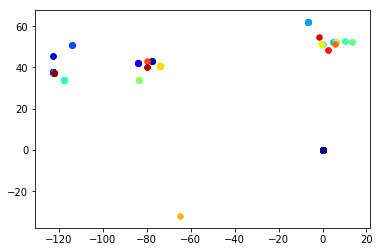

In [120]:
import matplotlib.pylab as pl
# 将聚类结果导出图
fig, ax = pl.subplots()
fig = event_dict
c_map = pl.get_cmap('jet', clustering.cluster_num)
c = 0
for cluster in clustering.cluster_list:
    for node in cluster.node_list:
        ax.scatter(a[node][0], a[node][1], c=c, s=30, cmap=c_map, vmin=0, vmax=clustering.cluster_num)
    c += 1
pl.show()


In [121]:
y=525600
x=28/y
x

5.3272450532724505e-05

In [122]:
from sklearn import metrics

def nmi():
    data['dis_cluster']=-1
    temp=data.dis_cluster
    true=[]
    test=[]
    c=0
    for cluster in clustering.cluster_list:
        for node in cluster.node_list:
            #ax.scatter(a[node][0], a[node][1], c=c, s=30, cmap=c_map, vmin=0, vmax=clustering.cluster_num)
            if data.location[node]!="0":
                true.append(data.event[node])
                test.append(c)
        c += 1


    return metrics.adjusted_mutual_info_score(true, test)  


In [134]:
test_one=data[['longitude', 'latitude']];
a=test_one.head(10000).values.tolist()
clustering = OnePassCluster(vector_list=a, t=0.1)
event_dict=data.head(10000).id
event_dict=event_dict.astype(str)
result=nmi()
result

0.95568227594771848

In [46]:
vec_a=a[0]
vec_a

[0.0, 0.0]

In [47]:
vec_a[1]

0.0

In [257]:
best_t=0
best_result=0
test_case=[2,1,0.5,0.2,0.1,0.05,0.01,0.001]
test_second=data[['longitude', 'latitude']];
for t in test_case:
    a=test_second.head(6666).values.tolist()
    clustering = OnePassCluster(vector_list=a, t=t)
    event_dict=data.head(6666).id
    event_dict=event_dict.astype(str)
    result=nmi()
    print(result)
    if result>best_result:
        best_result=result
        best_t=t

0.872275950604
0.924469998046
0.955395978347
0.964325159358
0.957442586329
0.942117799916
0.917991776431
0.878400509986


In [53]:
best_t=0
best_result=0
test_case=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005]
test_second=data[['longitude', 'latitude']];
for t in test_case:
    a=test_second.head(50000).values.tolist()
    clustering = OnePassCluster(vector_list=a, t=t)
    event_dict=data.head(50000).id
    event_dict=event_dict.astype(str)
    result=nmi()
    print(result)
    if result>best_result:
        best_result=result
        best_t=t

0.828562956037
0.840071989344
0.856263184341
0.861603652201
0.869990251595
0.877562523116
0.885170931742
0.891577449992
0.896763257844
0.90035297289
0.888086915356


KeyboardInterrupt: 

In [54]:

test_case=[0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0017]
test_second=data[['longitude', 'latitude']];
for t in test_case:
    a=test_second.head(50000).values.tolist()
    clustering = OnePassCluster(vector_list=a, t=t)
    event_dict=data.head(50000).id
    event_dict=event_dict.astype(str)
    result=nmi()
    print(result)
    if result>best_result:
        best_result=result
        best_t=t

0.897495846796
0.897130675604
0.895583259877


KeyboardInterrupt: 